In [1]:
# lets start by uploading the different librairies

#

In [1]:
import pandas as pd
import numpy as np
from numpy.lib.tests.test__datasource import malicious_files
from sklearn.model_selection import train_test_split


In [5]:

data = pd.read_csv('/mnt/LockShieldStorage/project/ls23pr_v1.csv', low_memory=False)

In [29]:
data.columns.to_list()
# data.columns = data.columns.str.strip()

['Flow ID',
 'SrcIP',
 'DstIP',
 'SrcPort',
 'DstPort',
 'Protocol',
 'mTimestampStart',
 'mTimestampLast',
 'Flow Duration',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Min',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Min',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Max',
 'Flow IAT Stddev',
 'Fwd IAT Min',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Bwd IAT Min',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Fwd PSH flags',
 'Bwd PSH flags',
 'Fwd URG flags',
 'Bwd URG flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Cnt',
 'SYN Flag Cn

In [30]:
suricata  =  ['SigID revision', 'Category','Severity', 'Anomaly_event' ]
print(suricata)

['SigID revision', 'Category', 'Severity', 'Anomaly_event']


In [31]:
suricata_data = data[suricata]

In [ ]:
data_flow = data.drop(columns=['SigID revision', 'Category','Severity', 'Anomaly_event' ])


In [12]:
columns_specials = ['Label_src', 'Label_dst']
DataFlow = data_flow.drop(columns=columns_specials)

In [13]:
print(DataFlow["Label"].value_counts())

Label
0    14708912
1     1644599
Name: count, dtype: int64


In [14]:
# I would like now to check the distribution of the data for the Label = 00
# let's separate the 2 datas

begnin = DataFlow[DataFlow["Label"] == 0]
malictious = DataFlow[DataFlow["Label"] == 1]

print("Begnin data size : ", begnin.shape)
print("malicous Data size :", malictious.shape)

# lets keep enough datas for the two types of datas
malicious_size = malictious.shape[0]
begnin_data  = begnin.sample(n=malicious_size, random_state=142)

print("Begnin data size : ", begnin_data.shape)
print("malicous Data size :", malictious.shape)





Begnin data size :  (14708912, 95)
malicous Data size : (1644599, 95)
Begnin data size :  (1644599, 95)
malicous Data size : (1644599, 95)


In [15]:
# lets make the two datasets together and shuffle

balanced_data = pd.concat([begnin_data, malictious])
print("size of balanced data : ", balanced_data.shape)

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)



size of balanced data :  (3289198, 95)


In [16]:
balanced_data.to_csv("balanced_data.csv", index=False)

In [45]:
# lets load the datas
balanced_data = pd.read_csv("balanced_data.csv", low_memory=False)


In [46]:
balanced_data.head()

,Flow ID,SrcIP,DstIP,SrcPort,DstPort,Protocol,mTimestampStart,mTimestampLast,Flow Duration,Flow Bytes/s,...,Int/Ext Dst IP,Conn_state,Service,Label,External_src,External_dst,Segment_src,Segment_dst,Expoid_src,Expoid_dst
0,10.5.8.2-100.101.1.193-64286-80-6,10.5.8.2,100.101.1.193,64286,80,6,1678369949284619,1678369949295858,11239,2.467301e+05,...,1,SF,NaN,1,0,1,baf_int,NaN,dc1.int.baf.05.berylia.org,NaN
1,10.5.8.4-100.101.1.193-53267-80-6,10.5.8.4,100.101.1.193,53267,80,6,1678367661716757,1678367661723688,6931,3.432405e+05,...,1,SF,Http,1,0,1,baf_int,NaN,files.int.baf.05.berylia.org,NaN
2,2a07:1182:0005:1001:0000:0000:0000:0037-2a00:16e0:0100:0000:c16d:8ed9:e86a:1111-61382-443-6,2a07:1182:0005:1001:0000:0000:0000:0037,2a00:16e0:0100:0000:c16d:8ed9:e86a:1111,61382,443,6,1678366467408717,1678366467424855,16138,3.139794e+05,...,1,OTH,TLS,1,0,1,baf_int,NaN,ws2-baf02.int.baf.05.berylia.org,NaN
3,10.5.12.12-57.70.176.80-51085-80-6,10.5.12.12,57.70.176.80,51085,80,6,1678358112170128,1678358112190397,20269,1.502294e+05,...,1,SF,NaN,1,0,1,baf_bg,NaN,ws1-bg02.int.baf.05.berylia.org,NaN
4,100.96.5.31-100.96.5.32-48249-8472-17,100.96.5.31,100.96.5.32,48249,8472,17,1678277529708947,1678277529708956,9,2.066667e+07,...,0,NaN,NaN,0,0,0,beg_dmz,beg_dmz,k8s-worker01.beg.05.berylia.org,k8s-worker02.beg.05.berylia.org


In [99]:
# let's separate the two types of datas X and y
X = balanced_data.drop(columns=['Label'])
X = X.drop(columns=['Flow ID', 'SrcIP', 'DstIP','External_src', 'External_dst','Conn_state', 'Segment_src', 'Segment_dst', 'Expoid_src', 'Expoid_dst','mTimestampStart','mTimestampLast'])
y = balanced_data['Label']

print(X.shape)
print(y.shape)

(3289198, 82)
(3289198,)


In [100]:
X.head()

,SrcPort,DstPort,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Tot Fwd Pkts,Tot Bwd Pkts,Total Length of Fwd Packet,Total Length of Bwd Packet,...,Active Mean,Active Max,Active Std,Idle Min,Idle Mean,Idle Max,Idle Std,L3/L4 Protocol,Int/Ext Dst IP,Service
0,64286,80,6,11239,2.467301e+05,1512.590088,12,5,1468.0,1305.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NaN
1,53267,80,6,6931,3.432405e+05,3029.865820,16,5,1324.0,1055.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Http
2,61382,443,6,16138,3.139794e+05,2292.725245,29,8,2565.0,2502.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TLS
3,51085,80,6,20269,1.502294e+05,937.392077,14,5,1602.0,1443.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NaN
4,48249,8472,17,9,2.066667e+07,333333.333333,3,0,186.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,NaN


In [101]:
# let's see where are the caterigolical datas

# Check the data types in your features
categorical_columns = X.select_dtypes(include=["object", "category"]).columns
print("Categorical columns:", categorical_columns.tolist())

# I will now replace the unknown values in the categorical data by a placeholder category

X[categorical_columns] = X[categorical_columns].fillna('Unknown')


Categorical columns: ['Service']


In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
label_encoder = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoder[col] = le

In [104]:
# trying to find if we have missing values in the dataset
missing_values = X.isnull().sum()
print(missing_values)


SrcPort             0
DstPort             0
Protocol            0
Flow Duration       0
Flow Bytes/s      152
                 ... 
Idle Max            0
Idle Std            0
L3/L4 Protocol      0
Int/Ext Dst IP      0
Service             0
Length: 82, dtype: int64


In [105]:

missing_columns = missing_values[missing_values > 0]
print("Columns with missing data:\n", missing_columns)

Columns with missing data:
 Flow Bytes/s          152
Flow IAT Mean      340184
Flow IAT Min       340184
Flow IAT Max       340184
Flow IAT Stddev    340184
dtype: int64


In [106]:


print("Contains NaN:", np.isnan(X).any())
print("Contains Infinity:", np.isinf(X).any())
print("Max Value:", np.max(X))
print("Min Value:", np.min(X))


Contains NaN: SrcPort           False
DstPort           False
Protocol          False
Flow Duration     False
Flow Bytes/s       True
                  ...  
Idle Max          False
Idle Std          False
L3/L4 Protocol    False
Int/Ext Dst IP    False
Service           False
Length: 82, dtype: bool
Contains Infinity: SrcPort           False
DstPort           False
Protocol          False
Flow Duration     False
Flow Bytes/s       True
                  ...  
Idle Max          False
Idle Std          False
L3/L4 Protocol    False
Int/Ext Dst IP    False
Service           False
Length: 82, dtype: bool
Max Value: inf
Min Value: -130.0


In [107]:
# we figure out that we have infinite values so we need to treat these data
# what if we replace these datas by nan and then by the mean

X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [108]:

print("Contains NaN:", np.isnan(X).any())
print("Contains Infinity:", np.isinf(X).any())
print("Max Value:", np.max(X))
print("Min Value:", np.min(X))


Contains NaN: SrcPort           False
DstPort           False
Protocol          False
Flow Duration     False
Flow Bytes/s       True
                  ...  
Idle Max          False
Idle Std          False
L3/L4 Protocol    False
Int/Ext Dst IP    False
Service           False
Length: 82, dtype: bool
Contains Infinity: SrcPort           False
DstPort           False
Protocol          False
Flow Duration     False
Flow Bytes/s      False
                  ...  
Idle Max          False
Idle Std          False
L3/L4 Protocol    False
Int/Ext Dst IP    False
Service           False
Length: 82, dtype: bool
Max Value: 1518000000.0
Min Value: -130.0


In [109]:
# let's fill the datas with the mean directly
X = X.fillna(X.mean())


In [110]:
# now that we have already numerilzed everything, let's normalize the data to range [0, 1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [111]:
X_normalized

array([[0.98094148, 0.001221  , 0.04545455, ..., 0.        , 1.        ,
        0.84      ],
       [0.81280232, 0.001221  , 0.04545455, ..., 0.        , 1.        ,
        0.12      ],
       [0.93662928, 0.00676129, 0.04545455, ..., 0.        , 1.        ,
        0.8       ],
       ...,
       [0.54099336, 0.001221  , 0.04545455, ..., 0.        , 1.        ,
        0.12      ],
       [0.88839551, 0.001221  , 0.04545455, ..., 0.        , 1.        ,
        0.84      ],
       [0.62343786, 0.001221  , 0.04545455, ..., 0.        , 1.        ,
        0.12      ]])

In [112]:
# apply the scaler to the features
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

X_scaled = Scaler.fit_transform(X)
# convert back to a dataframe to preserve column names

In [113]:
# let's devide our datatset into 80 10 10
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [114]:
# Check proportions
total_samples = len(X_scaled)
print(f"Training: {len(X_train) / total_samples:.2%}")
print(f"Validation: {len(X_val) / total_samples:.2%}")
print(f"Test: {len(X_test) / total_samples:.2%}")

Training: 70.00%
Validation: 15.00%
Test: 15.00%


In [115]:
# now we will apply XGBoost on the dataset
import xgboost as xgb

In [116]:
# Convert data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)




In [117]:
# define the different parameters

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',       # Use log loss for evaluation
    'learning_rate': 0.1,           # Learning rate
    'max_depth': 8,                 # Maximum depth of trees
    'subsample': 0.8,               # Subsample ratio
    'colsample_bytree': 0.8         # Feature subsample ratio
}

In [118]:
# Train the model
evals = [(dtrain, 'train'), (dval, 'validation')]
xgb_model = xgb.train(params, dtrain, num_boost_round=200, evals=evals, early_stopping_rounds=10)


[0]	train-logloss:0.59926	validation-logloss:0.59929
[1]	train-logloss:0.52207	validation-logloss:0.52212
[2]	train-logloss:0.45783	validation-logloss:0.45788
[3]	train-logloss:0.40330	validation-logloss:0.40336
[4]	train-logloss:0.35652	validation-logloss:0.35659
[5]	train-logloss:0.31646	validation-logloss:0.31654
[6]	train-logloss:0.28156	validation-logloss:0.28165
[7]	train-logloss:0.25116	validation-logloss:0.25125
[8]	train-logloss:0.22446	validation-logloss:0.22456
[9]	train-logloss:0.20090	validation-logloss:0.20100
[10]	train-logloss:0.18014	validation-logloss:0.18026
[11]	train-logloss:0.16178	validation-logloss:0.16189
[12]	train-logloss:0.14550	validation-logloss:0.14562
[13]	train-logloss:0.13078	validation-logloss:0.13090
[14]	train-logloss:0.11790	validation-logloss:0.11802
[15]	train-logloss:0.10641	validation-logloss:0.10653
[16]	train-logloss:0.09604	validation-logloss:0.09617
[17]	train-logloss:0.08666	validation-logloss:0.08679
[18]	train-logloss:0.07843	validation-

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
# Predict on the test set
y_pred_proba = xgb_model.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.6f}")

Test Accuracy: 0.999893


In [121]:
# lets do further tests

from sklearn.metrics import classification_report
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    246865
           1       1.00      1.00      1.00    246515

    accuracy                           1.00    493380
   macro avg       1.00      1.00      1.00    493380
weighted avg       1.00      1.00      1.00    493380



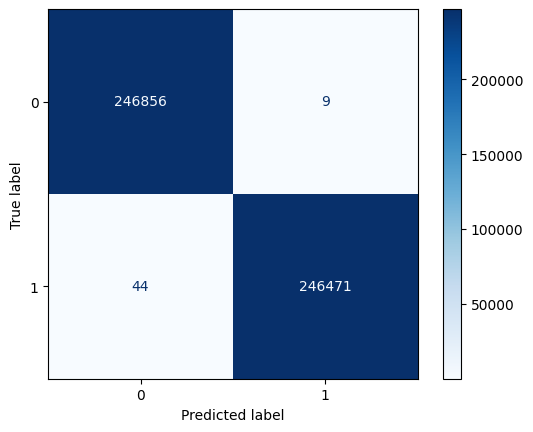

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

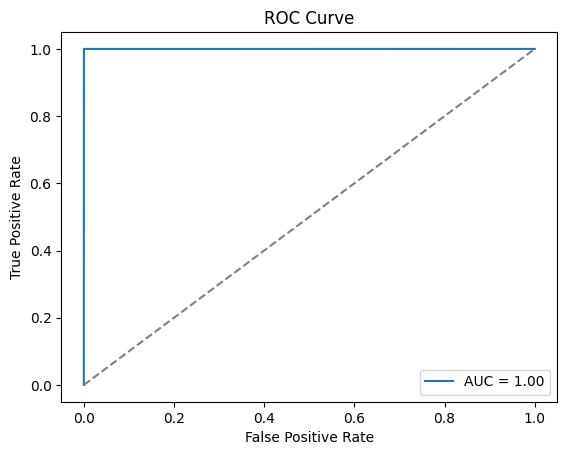

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


### tips
- replace missing values with 'unknown'
- replace with mode ( most frequest value )
- replace based on probabilities
- individual handling per variable

In [124]:
# since we have a good precisions lets study the dataset in details and try to figure out if the features are correlated or not

In [125]:
from xgboost import XGBClassifier, XGBRegressor

In [126]:
model = XGBClassifier(param=params)

In [127]:
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "param" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_thresho...one, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              param={'colsample_bytree': 0.8, 'eval_metric': 'logloss',
                     'learning_rate': 0.1, 'max_depth': 8,
                     'objective': 'binary:logistic', 'subsample': 0.8}, ...)

In [128]:
importance = model.get_booster().get_score(importance_type='weight')



In [129]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
}).sort_values(by='Importance', ascending=False)
print(importance_df)


   Feature  Importance
55     f67       150.0
0       f0       138.0
56     f68       133.0
11     f11       133.0
1       f1       124.0
..     ...         ...
44     f48        10.0
53     f65         8.0
67     f79         5.0
62     f74         3.0
32     f32         2.0

[70 rows x 2 columns]


<Figure size 1000x800 with 0 Axes>

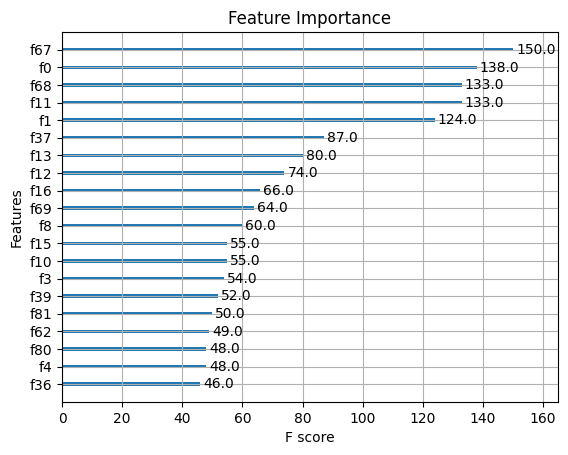

In [130]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=20)  # Change max_num_features as needed
plt.title('Feature Importance')
plt.show()


In [131]:
len(importance_df)

70

In [132]:
# Extract all feature indices from the importance dictionary
used_features = [int(f[1:]) for f in importance.keys()]
print(used_features)
print(len(used_features))





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 53, 54, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]
70


In [133]:
# Map these indices back to the original feature names
feature_mapping = {f"f{idx}": X.columns[idx] for idx in used_features}


In [134]:
# Print the mapping
for feature, original_name in feature_mapping.items():
    print(f"{feature} -> {original_name}")


f0 -> SrcPort
f1 -> DstPort
f2 -> Protocol
f3 -> Flow Duration
f4 -> Flow Bytes/s
f5 -> Flow Packets/s
f6 -> Tot Fwd Pkts
f7 -> Tot Bwd Pkts
f8 -> Total Length of Fwd Packet
f9 -> Total Length of Bwd Packet
f10 -> Fwd Packet Length Min
f11 -> Fwd Packet Length Max
f12 -> Fwd Packet Length Mean
f13 -> Fwd Packet Length Std
f14 -> Bwd Packet Length Min
f15 -> Bwd Packet Length Max
f16 -> Bwd Packet Length Mean
f17 -> Bwd Packet Length Std
f18 -> Flow IAT Mean
f19 -> Flow IAT Min
f20 -> Flow IAT Max
f21 -> Flow IAT Stddev
f22 -> Fwd IAT Min
f23 -> Fwd IAT Max
f24 -> Fwd IAT Mean
f25 -> Fwd IAT Std
f26 -> Fwd IAT Tot
f27 -> Bwd IAT Min
f28 -> Bwd IAT Max
f29 -> Bwd IAT Mean
f30 -> Bwd IAT Std
f31 -> Bwd IAT Tot
f32 -> Fwd PSH flags
f36 -> Fwd Header Length
f37 -> Bwd Header Length
f38 -> Fwd Packets/s
f39 -> Bwd Packets/s
f40 -> Packet Length Min
f41 -> Packet Length Max
f42 -> Packet Length Mean
f43 -> Packet Length Std
f45 -> FIN Flag Cnt
f46 -> SYN Flag Cnt
f47 -> RST Flag Cnt
f48 -> PS

In [98]:
mean_importance = importance_df['Importance'].mean()
important_features = importance_df[importance_df['Importance'] > mean_importance]




print(important_features)


   Feature  Importance  Cumulative_Importance
57     f69       133.0                  133.0
58     f70       127.0                  260.0
1       f1       117.0                  377.0
3       f3       115.0                  492.0
0       f0       106.0                  598.0
13     f13        94.0                  692.0
36     f39        73.0                  765.0
59     f71        66.0                  831.0
14     f14        65.0                  896.0
15     f15        64.0                  960.0
18     f18        60.0                 1020.0
4       f4        60.0                 1080.0
12     f12        57.0                 1137.0
71     f83        56.0                 1193.0
10     f10        56.0                 1249.0
5       f5        55.0                 1304.0
8       f8        54.0                 1358.0
9       f9        51.0                 1409.0
42     f45        51.0                 1460.0
17     f17        49.0                 1509.0
38     f41        48.0            

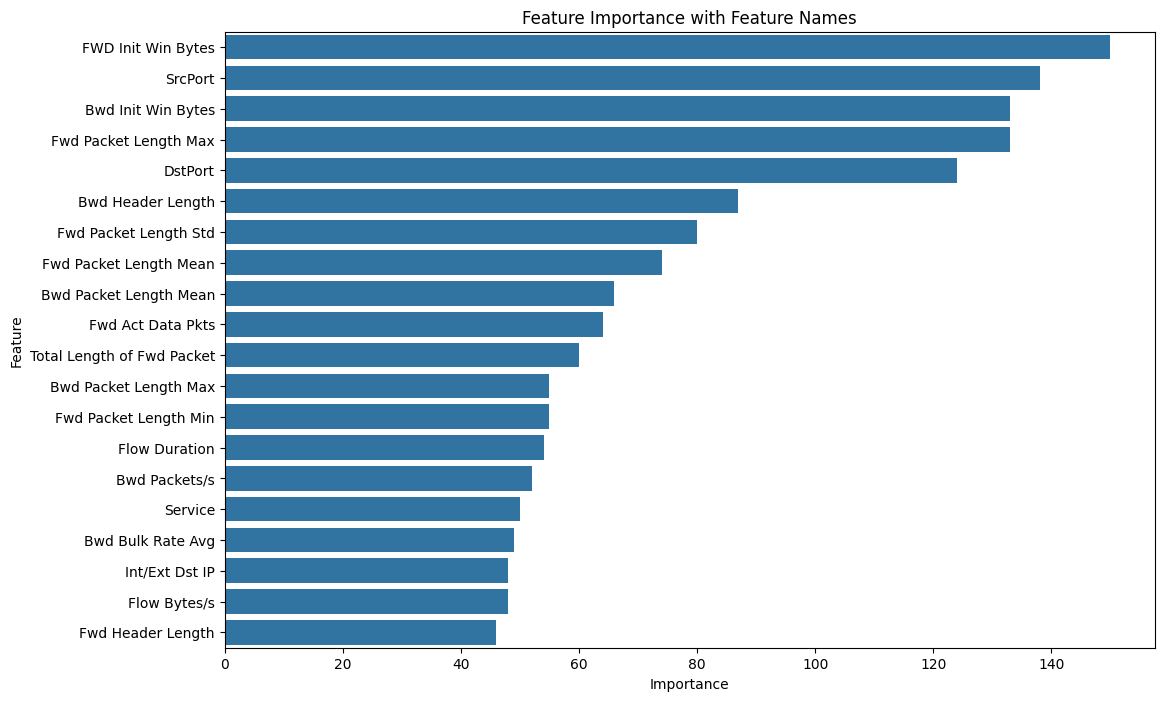

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 1: Extract feature importance with original feature names
importance = model.get_booster().get_score(importance_type='weight')
feature_mapping = {f"f{idx}": X.columns[idx] for idx in range(len(X.columns))}
importance_with_names = {feature_mapping[f]: importance[f] for f in importance.keys()}

# Step 2: Convert to DataFrame for easier sorting and visualization
importance_df = pd.DataFrame({
    'Feature': importance_with_names.keys(),
    'Importance': importance_with_names.values()
}).sort_values(by='Importance', ascending=False)

# Step 3: Plot using matplotlib or seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Plot top 20 features
plt.title('Feature Importance with Feature Names')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# batch file doc :

#!/bin/bash
#SBATCH --job-name=testCluster          # Job name
#SBATCH --output=my_job_%j.out     # Output file
#SBATCH --error=my_job_%j.err      # Error file        #
#SBATCH -n 80                # Number of tasks
#SBATCH --cpus-per-task=2          # CPUs per task
#SBATCH --time=02:00:00            # Time limit
#SBATCH -N 1
